## Instructions

Before you submit this project, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Please see the module book for full instructions on completing the project and submitting properly.

Make sure you *only* fill in places that say `your code goes here` or "YOUR ANSWER HERE". Replace the contents of those cells only, changing other cells may prevent grading. It is recommended to work in a copy and enter final answers in the submission version at the end.

When using matplotlib please make sure to use the inline option (not notebook) to allow grading: 
`%matplotlib inline`

Be aware, marks are available for following the usual good practice guidlines when creating Python code; e.g. good use of functions, efficient coding conventions, code comments etc. 

---

# Project 2: Solving a BVP

This project will consider the numerical solution of the following boundary value problem

$$
y'' - y= x + \sin(\pi x)
$$

subject to $y(0)=0$ and $y(1)=\frac{1}{2}.$

## Q1

Obtain the exact solution, $y(x),$ to this problem (by hand) and program a Python function `yExact(x)` to evaluate it. The function should accept numpy arrays as arguments. 

**[1]**


In [9]:
# your code goes here

# Import relevant packages:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def yExact(x):
    y = (3/(2*np.sinh(1)))*np.sinh(x) -x -(1/(np.pi**2 + 1))*np.sin(np.pi*x)
    return y

In [10]:
# Don't edit this cell

if not "yExact" in globals():
    raise NotImplementedError("yExact has not been defined in Question 1")


## Q2

Using second order (centred) finite differences create a matrix `matA` (a numpy array) to approximate the differential operator for the left hand side of the ODE, i.e. $\frac{d^2}{dx^2} -I,$ with $I$ the identity operator. Use $N=50$ *interior* points to produce a $50\times 50$ matrix. Create the corresponding right hand side vector `vecb` which should contain the right hand sides of the equations plus contributions from the boundary conditions.

Note any correct form of the $\mathbf{Ax}=\mathbf{b}$ *system* will be accepted; $A$ must be consistent with $b.$

---

Set up functions for Gauss-Seidel, `GaussSeidel(A,x0,b,tol)`, and conjugate gradient iteration, `ConjGrad(A,x0,b,tol)`. You may use code found in the lecture notes or tutorial solutions, but take care that your functions accept the required arguments/parameters in the specified order, i.e. `A` the matrix, `x0` the starting guess, `b` the right hand side vector and `tol` the tolerance to solve the system to (i.e. $\|\mathbf{Ax^{(n)}-b}\|_\infty<tol$ for convergence). Your function should return the final vector and the final iteration number, in that order.

---

Solve the linear system created in the first part (`matA` and `vecb`) using the two functions `GaussSeidel` and `ConjGrad`, setting `tol` to $10^{-7},$ `x0` to be an array of zeros and store the solution in arrays `yGS` and `yCG` for Gauss-Seidel and conjugate gradient respectively. *Your solution arrays should include the boundary points.* 

Obtain the $L_2$ *relative* error between the two numerical solutions and the exact solution defined in **Q1**, storing as `errorGS` and `errorCG`.

Plot the solutions and errors using appropriate axes, labels etc. 

**[7]**

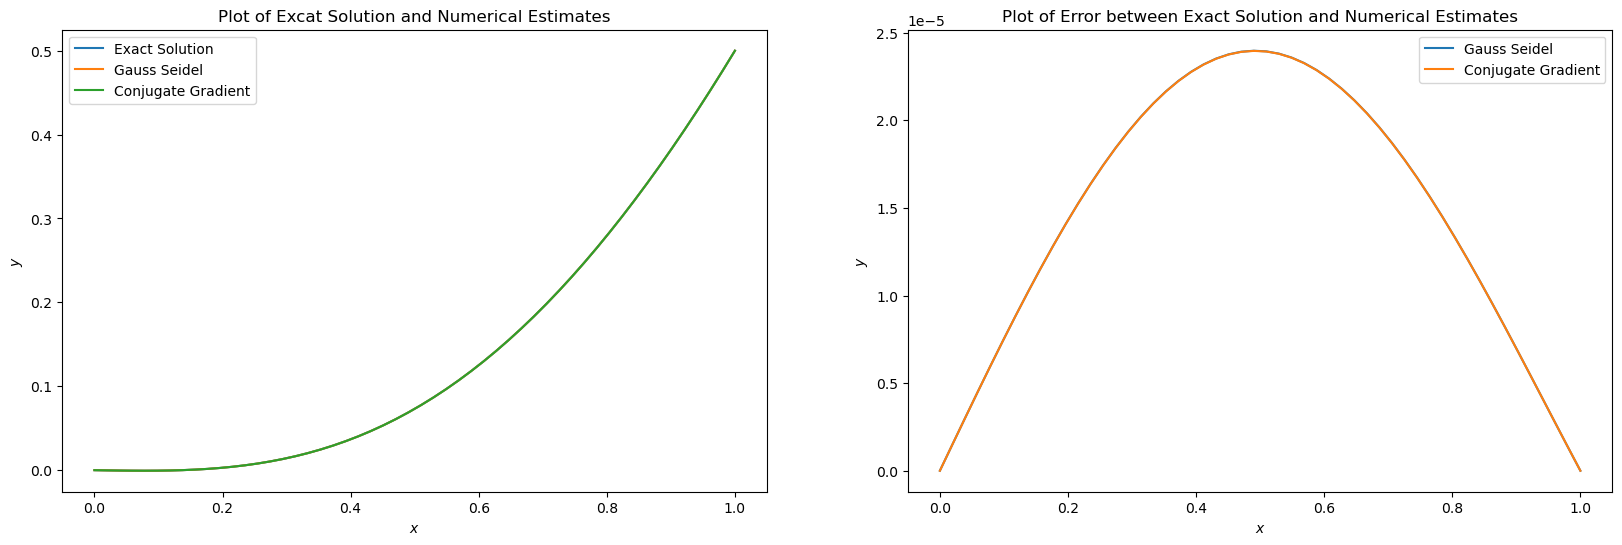

In [11]:
# your code goes here

# Set parameters
N = 50
a = 0
b = 1
h = (b-a) / (N+1)                              # Get spacing of Interior points
xvals = np.linspace(a+h,b-h,N)                 # x values of interior points

## matA
####################################
ik = np.arange(N)
matA = np.zeros ((N,N))
matA[ik[:],ik[:]] = - 2
matA[ik[1:N],ik[1:N]-1] = 1
matA[ik[1:N]-1, ik[1:N]] = 1
matA /= h**2
matA -= np.eye(N)

## vecb
####################################
vecb = xvals + np.sin(np.pi * xvals)
vecb[-1] -= 0.5/h**2                       # By rearranging the component-wise expression, can see this must be done to include BC

## Gauss-Seidel
####################################

def GaussSeidel(A,x0,b,tol):    
    Nx,Ny = np.shape(A)
    x = np.zeros(Nx)                       # use x for the k iteration
    y = np.zeros(Nx)                       # use y for the k+1 iteration
    x[:] = x0
    niter = 50000                          # Increase max no. of itterations to ensure converagnce later
    for k in range(niter):
        for i in range(Nx):
            s1 = A[i, :i]@y[:i]                    # Lx^(k+1)
            s2 = A[i, i+1:]@x[i+1:]                # Ux^(k)
            y[i] = (b[i] - s1 - s2)/A[i,i]         # D^-1(b-Lx^(k+1)-Ux^(k))
        if(np.max(np.abs(A@y-b))<tol):             # check for convergence
            return y,k
        x[:] = y
    return x,k

## Conjugate Gradient
####################################

def ConjGrad(A,x0,b,tol):     
    Nx,Ny = np.shape(A)
    y = np.zeros(Nx)                               # use y for the k+1 iteration
    x = x0
    niter = 50000
    rk = b-A@x0
    pk = np.copy(rk)
    for k in range(niter):
        Ap = A@pk
        alpha = np.dot(rk,pk)/np.dot(pk,Ap)
        y = x0 + alpha*pk
        rk = b-A@y
        pk = rk - pk*(np.dot(rk,Ap)/np.dot(pk,Ap))
        if(np.max(np.abs(rk))<tol):                # check for convergence
            return y,k
        x[:] = y
    return x,k

## Solving the linear system
####################################
x0 = np.zeros(N)
tol = 1.e-7

yGS,kGS = GaussSeidel(matA,x0,vecb,tol)
yCG,kCG = ConjGrad(matA,x0,vecb,tol)

# Add in Boundary Points
yGS = np.insert(yGS,0,0)
yGS = np.append(yGS,0.5)

yCG = np.insert(yCG,0,0)
yCG = np.append(yCG,0.5)

## Error
####################################
xvals = np.linspace(a,b,N+2)                    # Redefine xvals to include the boundary points             
y = yExact(xvals)

# Use numpy's function to take the 2-norm of the error and make it relative
def L2_rel(approx,exact):
    error = np.linalg.norm(approx-exact, 2) / np.linalg.norm(exact, 2)
    return error

errorGS = L2_rel(yGS, y)
errorCG = L2_rel(yCG, y)

## Plot
####################################
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(20,6))
ax[0].set_title('Plot of Excat Solution and Numerical Estimates')  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].plot(xvals, y,'-', label='Exact Solution')
ax[0].plot(xvals, yGS,'-', label='Gauss Seidel')
ax[0].plot(xvals, yCG,'-', label='Conjugate Gradient')
ax[0].legend();
ax[1].set_title('Plot of Error between Exact Solution and Numerical Estimates')  
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].plot(xvals, abs(y-yGS),'-', label='Gauss Seidel')
ax[1].plot(xvals, abs(y-yCG),'-', label='Conjugate Gradient')
ax[1].legend();

In [12]:
# Don't edit this cell

if not "matA" in globals():
    raise NotImplementedError("matA has not been defined in Question 2")
if not "vecb" in globals():
    raise NotImplementedError("vecb has not been defined in Question 2")
if not "GaussSeidel" in globals():
    raise NotImplementedError("GaussSeidel has not been defined in Question 2")
if not "ConjGrad" in globals():
    raise NotImplementedError("ConjGrad has not been defined in Question 2")
if not "yCG" in globals():
    raise NotImplementedError("yCG has not been defined in Question 2")
if not "yGS" in globals():
    raise NotImplementedError("YGS has not been defined in Question 2")
if not "errorGS" in globals():
    raise NotImplementedError("errorGS has not been defined in Question 2")
if not "errorCG" in globals():
    raise NotImplementedError("errorCG has not been defined in Question 2")


## Q3

Given the values of the errors and residuals that you have obtained in Q2, answer the following by creating Python variables `answer1`, `answer2` to be the string `true` or `false`:

1. The tolerance of $10^{-7}$ specified in the conjugate gradient method is sufficiently small to ensure the accuracy of the finite difference approximation is captured, with this number of points.


2. The tolerance of $10^{-7}$ specified in the Gauss-Seidel method is sufficiently small to ensure the accuracy of the finite difference approximation is captured, with this number of points.

**[1]**

In [13]:
# your code goes here
answer1 = 'true'
answer2 = 'true' 

In [14]:
# Don't edit this cell

if not "answer1" in globals():
    raise NotImplementedError("answer1 has not been defined in Question 3")
if not "answer2" in globals():
    raise NotImplementedError("answer2 has not been defined in Question 3")


## Q4

Using the Chebyshev differentiation matrix (`chebD` in lecture 2.7) create another version of the differential operator $\frac{d^2}{dx^2} - I$ again using 50 *interior* points and taking care with boundary contributions and the interval. 

Name the $50\times50$ matrix `matC` and the right hand side vector `vecd`. 

---

Solve the linear system using **Gauss-Seidel iteration** and the same tolerance and starting guess as in **Q2**, store the solution in `yCheb` and the $L_2$ relative error `errorCheb`. `yCheb` should include the boundary points. 


Plot the solutions and errors using appropriate axes, labels etc. 

---

As before, answer `true` or `false` using the python variable `answer3` for the following statement:

* the tolerance of $10^{-7}$ specified in the Gauss-Seidel method is sufficiently small to ensure the accuracy of the Chebyshev approximation is captured, with this number of points.

**[6]**


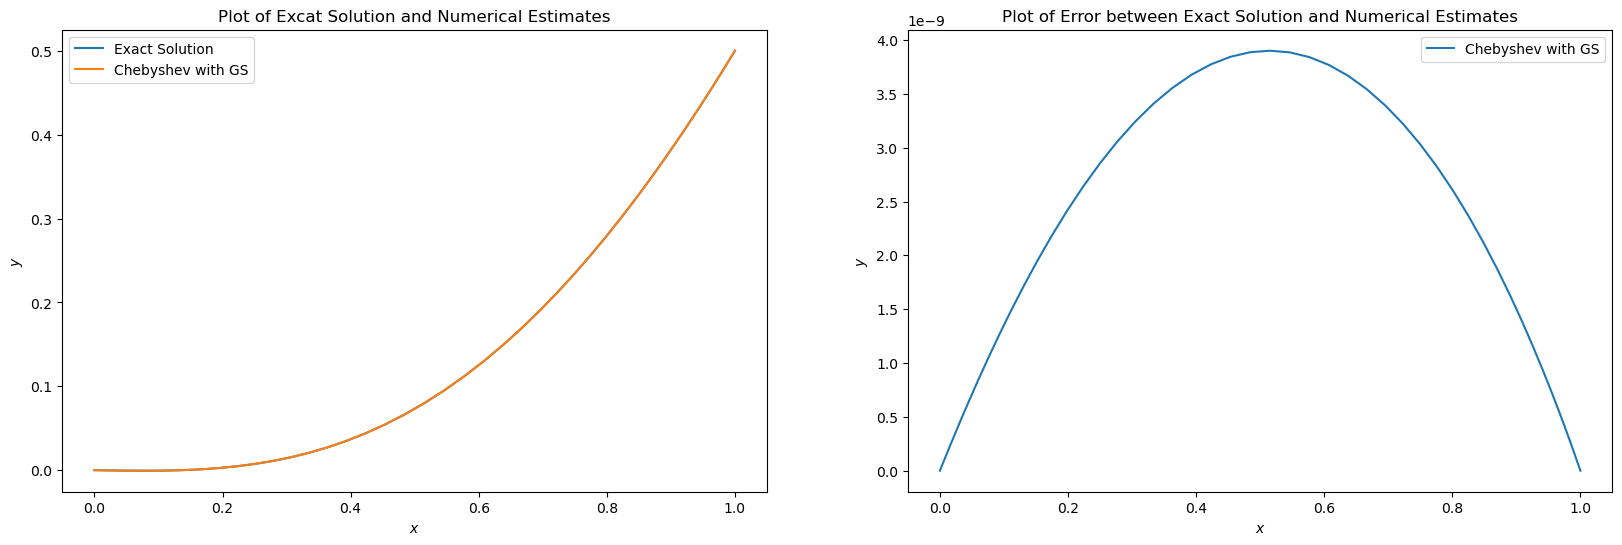

In [15]:
# your code goes here

## matC
####################################
N = 50

def chebD(N):
        if N == 0:
            D = 0.; x = 1.       # If N=0, differentiation matrix is empty and polynomial is zeroth-order (ie 1)
        else:
            n = np.arange(0, N)  
            x = np.cos(np.pi * n / (N - 1)).reshape(N, 1)
            c = (np.hstack(([2.], np.ones(N - 2), [2.])) * ((-1) ** n)).reshape(N, 1)
            X = np.tile(x, (1, N))
            dX = X - X.T
            D = np.dot(c, 1. / c.T) / (dX + np.eye(N))
            D -= np.diag(np.sum(D.T, axis=0))
        return D, x.reshape(N)   
    
matC, xvals1 = chebD(N+2)          # N+2 requird as matrix will include boundary points, hence N interior points

xvals1 = (xvals1+1)/2              #Preform Linear Transformation to get on required interval
xvals = xvals1[1:-1]               # Slice xvals s.t. they are interior points
matC = (2*matC) @ (2*matC)         # Get 2nd Order Cheb Diff. Matrix by squaring, ensuring chain rule is used 
BC = matC[1:-1,0]                  # For use later, but the BC is the first column as xvals start at 1
matC = matC[1:-1, 1:-1]            # Slice matC s.t. it will on be evaluated on interior points 
matC -= np.eye(N)


## vecd
####################################
vecd = xvals + np.sin(np.pi * xvals)
vecd -= 0.5*BC                        # Apply BC to all elements of vecd as thats how Cheb Diff. matrix works


## Solving the linear system
####################################
x0 = np.zeros(N)
tol = 1.e-7

yCheb,kCheb = GaussSeidel(matC,x0,vecd,tol) 

# Add in Boundary Points
yCheb = np.insert(yCheb,0,0.5)
yCheb = np.append(yCheb,0)

## Error
####################################
y = yExact(xvals1)                         # xvals1 is the unsliced xvals containing the boundary points
errorCheb = L2_rel(yCheb, y)

answer3 = 'false'                          # With a lower tolerance it can become multiple orders of magnitude more accurate

## Plot
####################################
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(20,6))
ax[0].set_title('Plot of Excat Solution and Numerical Estimates')  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].plot(xvals1, y,'-', label='Exact Solution')
ax[0].plot(xvals1, yCheb,'-', label='Chebyshev with GS')
ax[0].legend();
ax[1].set_title('Plot of Error between Exact Solution and Numerical Estimates')  
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$');
ax[1].plot(xvals1, abs(y-yCheb),'-', label='Chebyshev with GS')
ax[1].legend();

In [16]:
# Don't edit this cell

if not "matC" in globals():
    raise NotImplementedError("matC has not been defined in Question 4")
if not "vecd" in globals():
    raise NotImplementedError("vecd has not been defined in Question 4")
if not "yCheb" in globals():
    raise NotImplementedError("yCheb has not been defined in Question 4")
if not "errorCheb" in globals():
    raise NotImplementedError("errorCheb has not been defined in Question 4")
if not "answer3" in globals():
    raise NotImplementedError("answer3 has not been defined in Question 4")




## Q5

Why is the conjugate gradient method not applicable to the Chebyshev formulation? Write one short sentence to explain in the markdown box below. 

**[1]**

YOUR ANSWER HERE

MatC is a very dense matrix, with no zero entries, and conjugate gradient tends to only deal with sparse matrices effectively, hence is not suitable of a matrix this dense.

## Q6

Obtain the condition number of the two matrices `matA` and `matC` using `np.linalg.cond` under the $L_\infty$ norm and store these in variables `conA` and `conC`.

Increase the size of the system to $100\times100,$ (i.e. 100 interior points) creating `matA_100` (as in Q2) and `matC_100` (as in Q4), and obtain new condition numbers `conA_100` and `conC_100`.

---

Obtain the solution to the two $N=100$ systems from above using Gauss-Seidel iteration, storing the resulting $L_2$ relative error  in the Python variables `errFD_100` and `errCH_100` for finite-difference and Chebyshev respectively. You should take care to ensure the solutions of the systems are "fully" converged to an appropriate tolerance. 

**[4]**

In [ ]:
# your code goes here

## Condition Numbers
####################################
conA = np.linalg.cond(matA, np.inf)
conC = np.linalg.cond(matC, np.inf)

## Parameters for 100x100
####################################
N = 100
a = 0
b = 1
h = (b-a) / (N+1)                              # Get spacing of Interior points
xvals = np.linspace(a+h,b-h,N)                 # x values of interior points

## matA 100x100
####################################
ik = np.arange(N)
matA100 = np.zeros ((N,N))
matA100[ik[:],ik[:]] = - 2
matA100[ik[1:N],ik[1:N]-1] = 1
matA100[ik[1:N]-1, ik[1:N]] = 1
matA100 /= h**2
matA100 -= np.eye(N)

## matC 100x100
####################################
matC100, xcheb1 = chebD(N+2)
matC100 = (2*matC100) @ (2*matC100)               
BC = matC100[1:-1,0]                  
matC100 = matC100[1:-1, 1:-1]            
matC100 -= np.eye(N)

## Condition Numbers for 100x100
####################################
conA_100 = np.linalg.cond(matA100, np.inf)
conC_100 = np.linalg.cond(matC100, np.inf)

## Solve Linear System for 100x100
####################################
# Define RHS vector for Finite Difference
vecb = xvals + np.sin(np.pi * xvals)
vecb[-1] -= 0.5/h**2

# Define RHS vector for Chebyshev
xcheb1 = (xcheb1+1)/2
xcheb = xcheb1[1:-1]
vecd = xcheb + np.sin(np.pi * xcheb)
vecd -= 0.5*BC 

# Solve using GS
x0 = np.zeros(N)
tolFD = 1.e-6           
tolCH = 1.e-12                                 

yFD,kFD = GaussSeidel(matA100,x0,vecb,tolFD)
yCH,kCH = GaussSeidel(matC100,x0,vecd,tolCH)

# Add in Boundary Points for consistancy with above, although not needed for L2 error 
yFD = np.insert(yFD,0,0)
yFD = np.append(yFD,0.5)

yCH = np.insert(yCH,0,0.5)
yCH = np.append(yCH,0)

## Error
####################################
#Add in Boundary Points to be consistant with above
xvals = np.linspace(a,b,N+2)
yExact_FD = yExact(xvals)
errFD_100 = L2_rel(yFD, yExact_FD)

yExact_CH = yExact(xcheb1)
errCH_100 = L2_rel(yCH, yExact_CH)

In [ ]:
# Don't edit this cell

if not "conA" and "conC" in globals():
    raise NotImplementedError("conA and conC have not been defined in Question 6")

if not "matA_100" and "matC_100" in globals():
    raise NotImplementedError("matA_100 and matC_100 have not been defined in Question 6")

if not "conA_100" and "conC_100" in globals():
    raise NotImplementedError("conA_100 and conC_100 have not been defined in Question 6")

if not "errFD_100" in globals():
    raise NotImplementedError("errFD_100 has not been defined in Question 6")

if not "errCH_100" in globals():
    raise NotImplementedError("errCH_100 has not been defined in Question 6")



## Q7

In the markdown cell below, write a sentence or two to answer each of the following.

* Is the expected convergence rate for the finite difference method observed when comparing $N=50$ and $N=100?$ If so how is it seen? If not, why not?

* Given the structure of the finite difference differentiation matrix, suggest a way to increase the efficiency (or decrease resource use) of the implementation. Would this be applicable to the Chebyshev case? 

* Is decreasing the Gauss-Seidel tolerance (from the starting case of $10^{-7}$) an effective way to increase the accuracy of the Chebyshev approximation with 100 points? What about the finite difference case?

* Describe a more appropriate stopping criterion for the Gauss-Seidel iterative method which makes use of the condition number (do not implement this in your submitted code).

Justify all of your answers.

**[5]**

YOUR ANSWER HERE

BP 1:
We would expect the convergence rate to be quadratic as finite difference is a 2nd order method. As N increases, h decreases therefore you would expect the system to converge faster, in our case 4 times faster. This is NOT the case. The number of itterations taken to converge increases with N=100 incomparison to N=50. This is because the condition number for matA_100 is over 4 times larger than matA, hence its sensitivity to the initial guess is significantly greater, which will increase its number of itterations to converge. 

BP 2:
The finite difference matrix is very sparse, therefore so is the LDU decomposition. Therefore rather than computing computationally taxing matrix multiplication we can simply represent the non-zero terms in a vector and use this to compute the next iteration. This is not applicable to Chebyshev as there are no non-zero terms hence the fully matrix arithmetic is required. 

BP 3:
Assuming that there is a sufficent 'niter' in the Guass Sidel Function (ie enough so it can fully converge to a solution), it is possible to increase the accuracy of the Chebyshev significantly in comparision to the starting tolerance. Whereas, for finite differece there is a level of error that will will never be able to decrease bellow. And from the starting tolerance this level is reached. Finite difference is limited in its accuracy due to the fact we disregard higher order terms in the Taylor expansion.

BP 4:
From the relationship found in the notes we can see that the relative error must be less than or equal to the condition number multiplied by the relative residual. Hence we can set a critera to stop iterations when we reach a  specified solution tolerance, in comparision to stopping when we reach a given system tolerance, by using this relationship (ie the condition number).